In [17]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Combining test and train data

In [4]:
totalData = train.append(test, ignore_index=True)

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

Removing twitter handlers i.e. @users from totalData

In [6]:
totalData['clean_tweet'] = np.vectorize(remove_pattern)(totalData['tweet'], "@[\w]*")

In [7]:
totalData.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Remving numbers, characters except '#'

In [8]:
totalData['clean_tweet'] = totalData['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [9]:
totalData.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


Removing words less than 3 chars

In [10]:
totalData['clean_tweet']= totalData['clean_tweet'] .apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
totalData.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


Tokanization

In [12]:
tokenized_tweet = totalData['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

Stremming i.e removing ing, ly suffixes from the word as meaning does not change 
And removing stopwords using English stop words

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [i for i in x if not i in stop_words])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, caus, offer, wheelchair...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

Stich them back together

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

totalData['clean_tweet'] = tokenized_tweet
tokenized_tweet.head()

0       father dysfunct selfish drag kid dysfunct #run
1    thank #lyft credit caus offer wheelchair van #...
2                                       bihday majesti
3                                #model love take time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

Now we have completed the data cleaning process lets begin Data visualzation

Draw wordplot with frequnecy of words in combine dataset

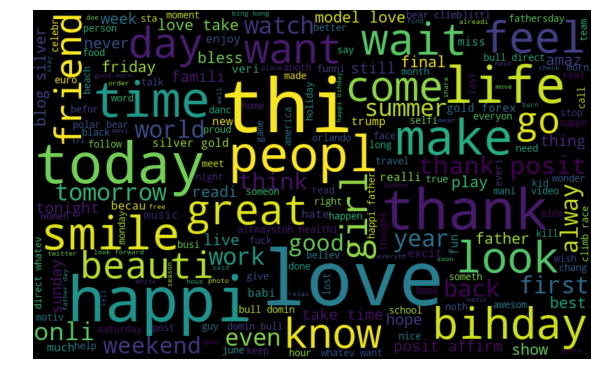

In [24]:
all_words = ' '.join([text for text in totalData['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Try this with positive tweets

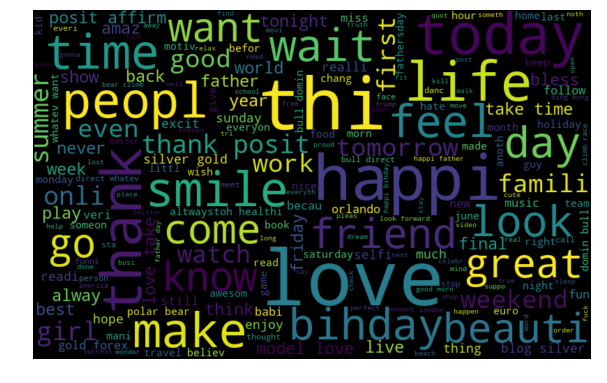

In [25]:
positive_words = ' '.join([text for text in totalData['clean_tweet'][totalData['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Try this with negative/racist tweets

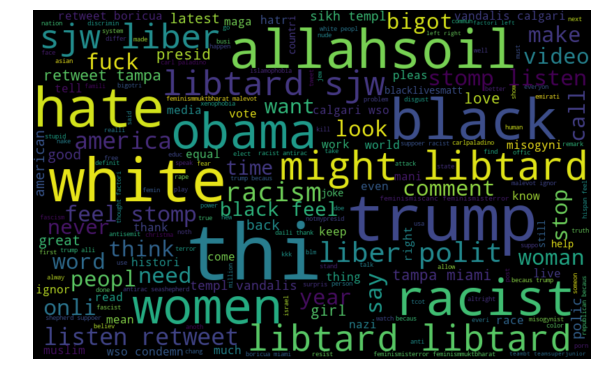

In [26]:
negative_words = ' '.join([text for text in totalData['clean_tweet'][totalData['label'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Lets work on hashtags

In [27]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

Extracting positive and Negativehashtags

In [21]:
positive_hashtags = hashtag_extract(totalData['clean_tweet'][totalData['label'] == 0])
negative_hashtags = hashtag_extract(totalData['clean_tweet'][totalData['label'] == 1])

positive_hashtags = sum(positive_hashtags,[])
negative_hashtags = sum(negative_hashtags,[])

Drawing bar diagram for positive hashtags

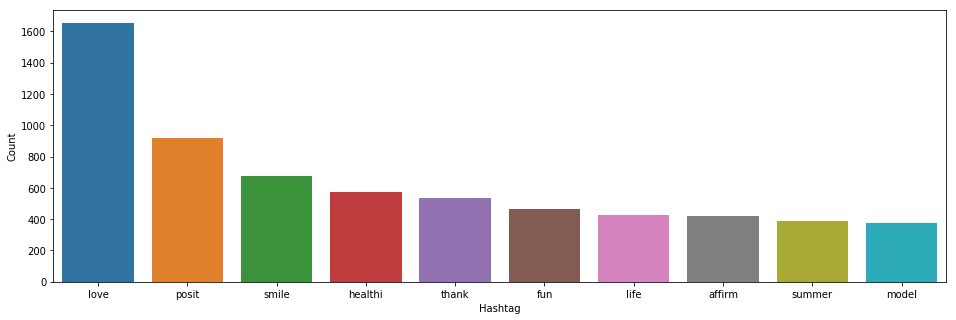

In [22]:
a = nltk.FreqDist(positive_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Drawing bar diagram for Negative hashtags

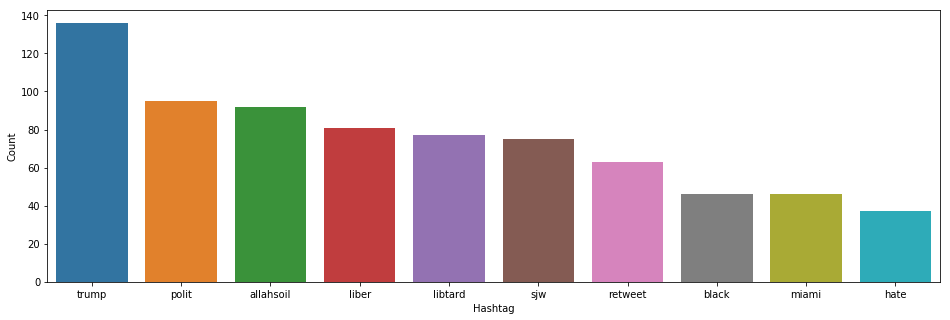

In [23]:
a = nltk.FreqDist(negative_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()